<a href="https://colab.research.google.com/github/aniket-sawant-2001/Gold-price-prediction-with-ML/blob/main/User_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [4]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as mlot
import seaborn as sa
from sklearn.cluster  import KMeans 

Data Collection and analysis

In [16]:
customer_data= pd.read_csv('/content/Mall_Customers.csv')
customer_data.head()
customer_data.shape
customer_data.info()
customer_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Chossing Anual Income and spending Colums

In [22]:
x = customer_data.iloc[:,[3,4]].values 
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Chossing Correct Number of Clusters
WCSS = Within cluster sum of sqaures

In [30]:
wcss=[]
for i in range(1,11):
  kmeans= KMeans(n_clusters=i , init="k-means++" , random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


Display the Lbow graph

<function matplotlib.pyplot.show>

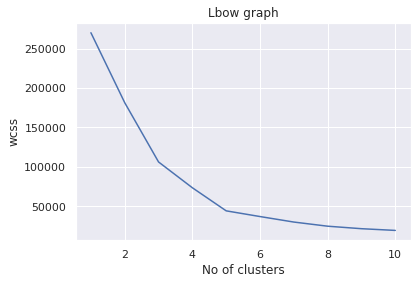

In [31]:
sa.set()
mlot.plot(range(1,11),wcss)
mlot.title("Lbow graph")
mlot.xlabel("No of clusters")
mlot.ylabel("wcss")
mlot.show

Creating 5 clusters

In [35]:
kmeans= KMeans(n_clusters=5, init='k-means++', random_state=0)
Y=kmeans.fit_predict(x)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualising all the clusters

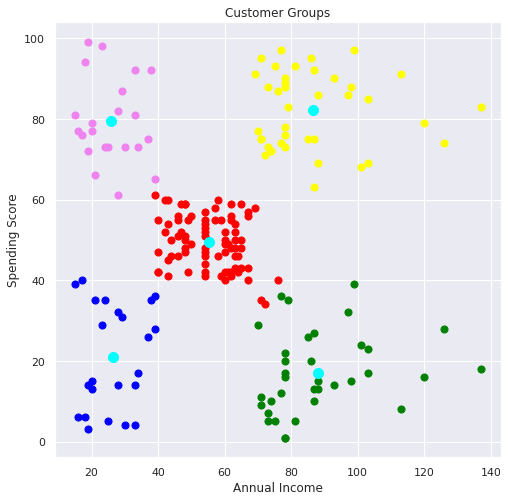

In [36]:
mlot.figure(figsize=(8,8))
mlot.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
mlot.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
mlot.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
mlot.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
mlot.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
mlot.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

mlot.title('Customer Groups')
mlot.xlabel('Annual Income')
mlot.ylabel('Spending Score')
mlot.show()